<a href="https://colab.research.google.com/github/natalie2103/CS103/blob/main/act2_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LAB 2**

**Importing Libraries and Packages**

In [2]:
#Importing libraries and Dataset
#packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Mounted at /gdrive
/gdrive


**Data Reading**

In [4]:
#Read the pima indians diabetes dataset
import pandas as pd
diabetes_data = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/pima-indians-diabetes.csv")

#View 1st 5 rows of the data
diabetes_data.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Numbers of rows and columns in the dataset**

In [ ]:
shape = diabetes_data.shape
print(shape)

(768, 9)


**Data types of each column**

In [ ]:
dt_types = diabetes_data.dtypes
print(dt_types)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


**Descriptive analysis of the data**

**Summarizing the data**

In [39]:
analysis = diabetes_data.describe()
print(analysis)

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

**List of data types**

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Class distribution**

In [ ]:
class_distribution = diabetes_data['class'].value_counts()
print(class_distribution)

class
0    500
1    268
Name: count, dtype: int64


In [ ]:
diabetes_data.groupby('class').mean()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**Checking for null values**

In [ ]:
print(diabetes_data.isnull().sum())

**Showing the count of Nans**

In [ ]:
diabetes_data=diabetes_data.copy(deep = True)

diabetes_data[['preg','plas','pres','skin','test','mass']]=diabetes_data[['preg','plas','pres','skin','test','mass']].replace(0,np.nan)

print(diabetes_data.isnull().sum())

preg     111
plas       5
pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64


**Creating Correlation Matrix**

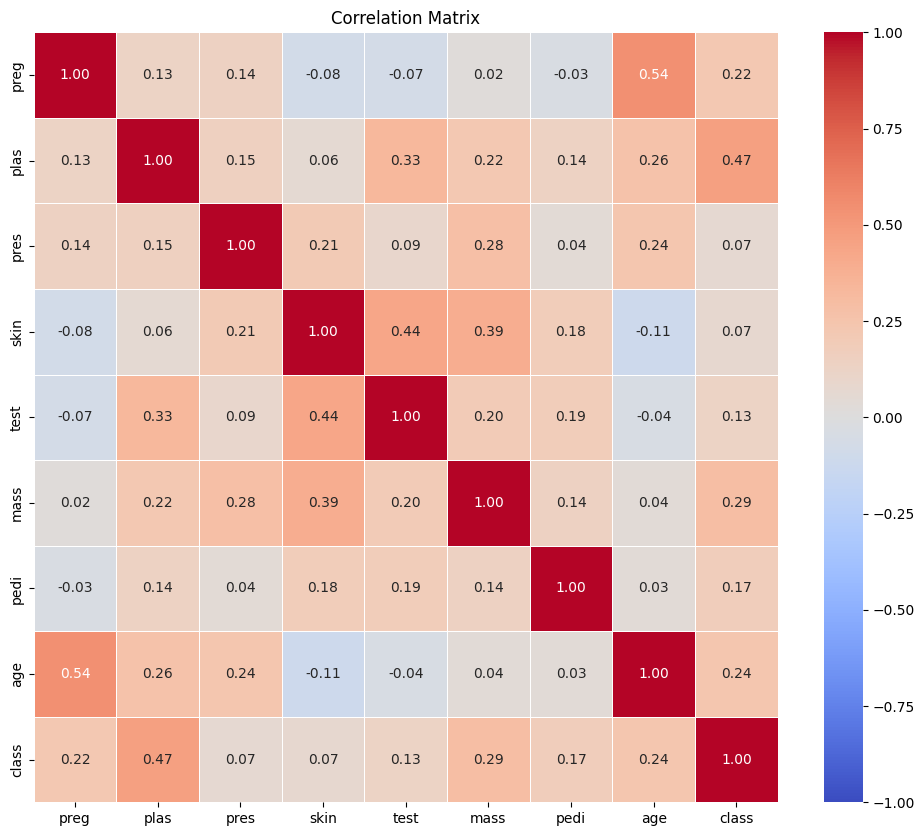

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**Creating Histograms**

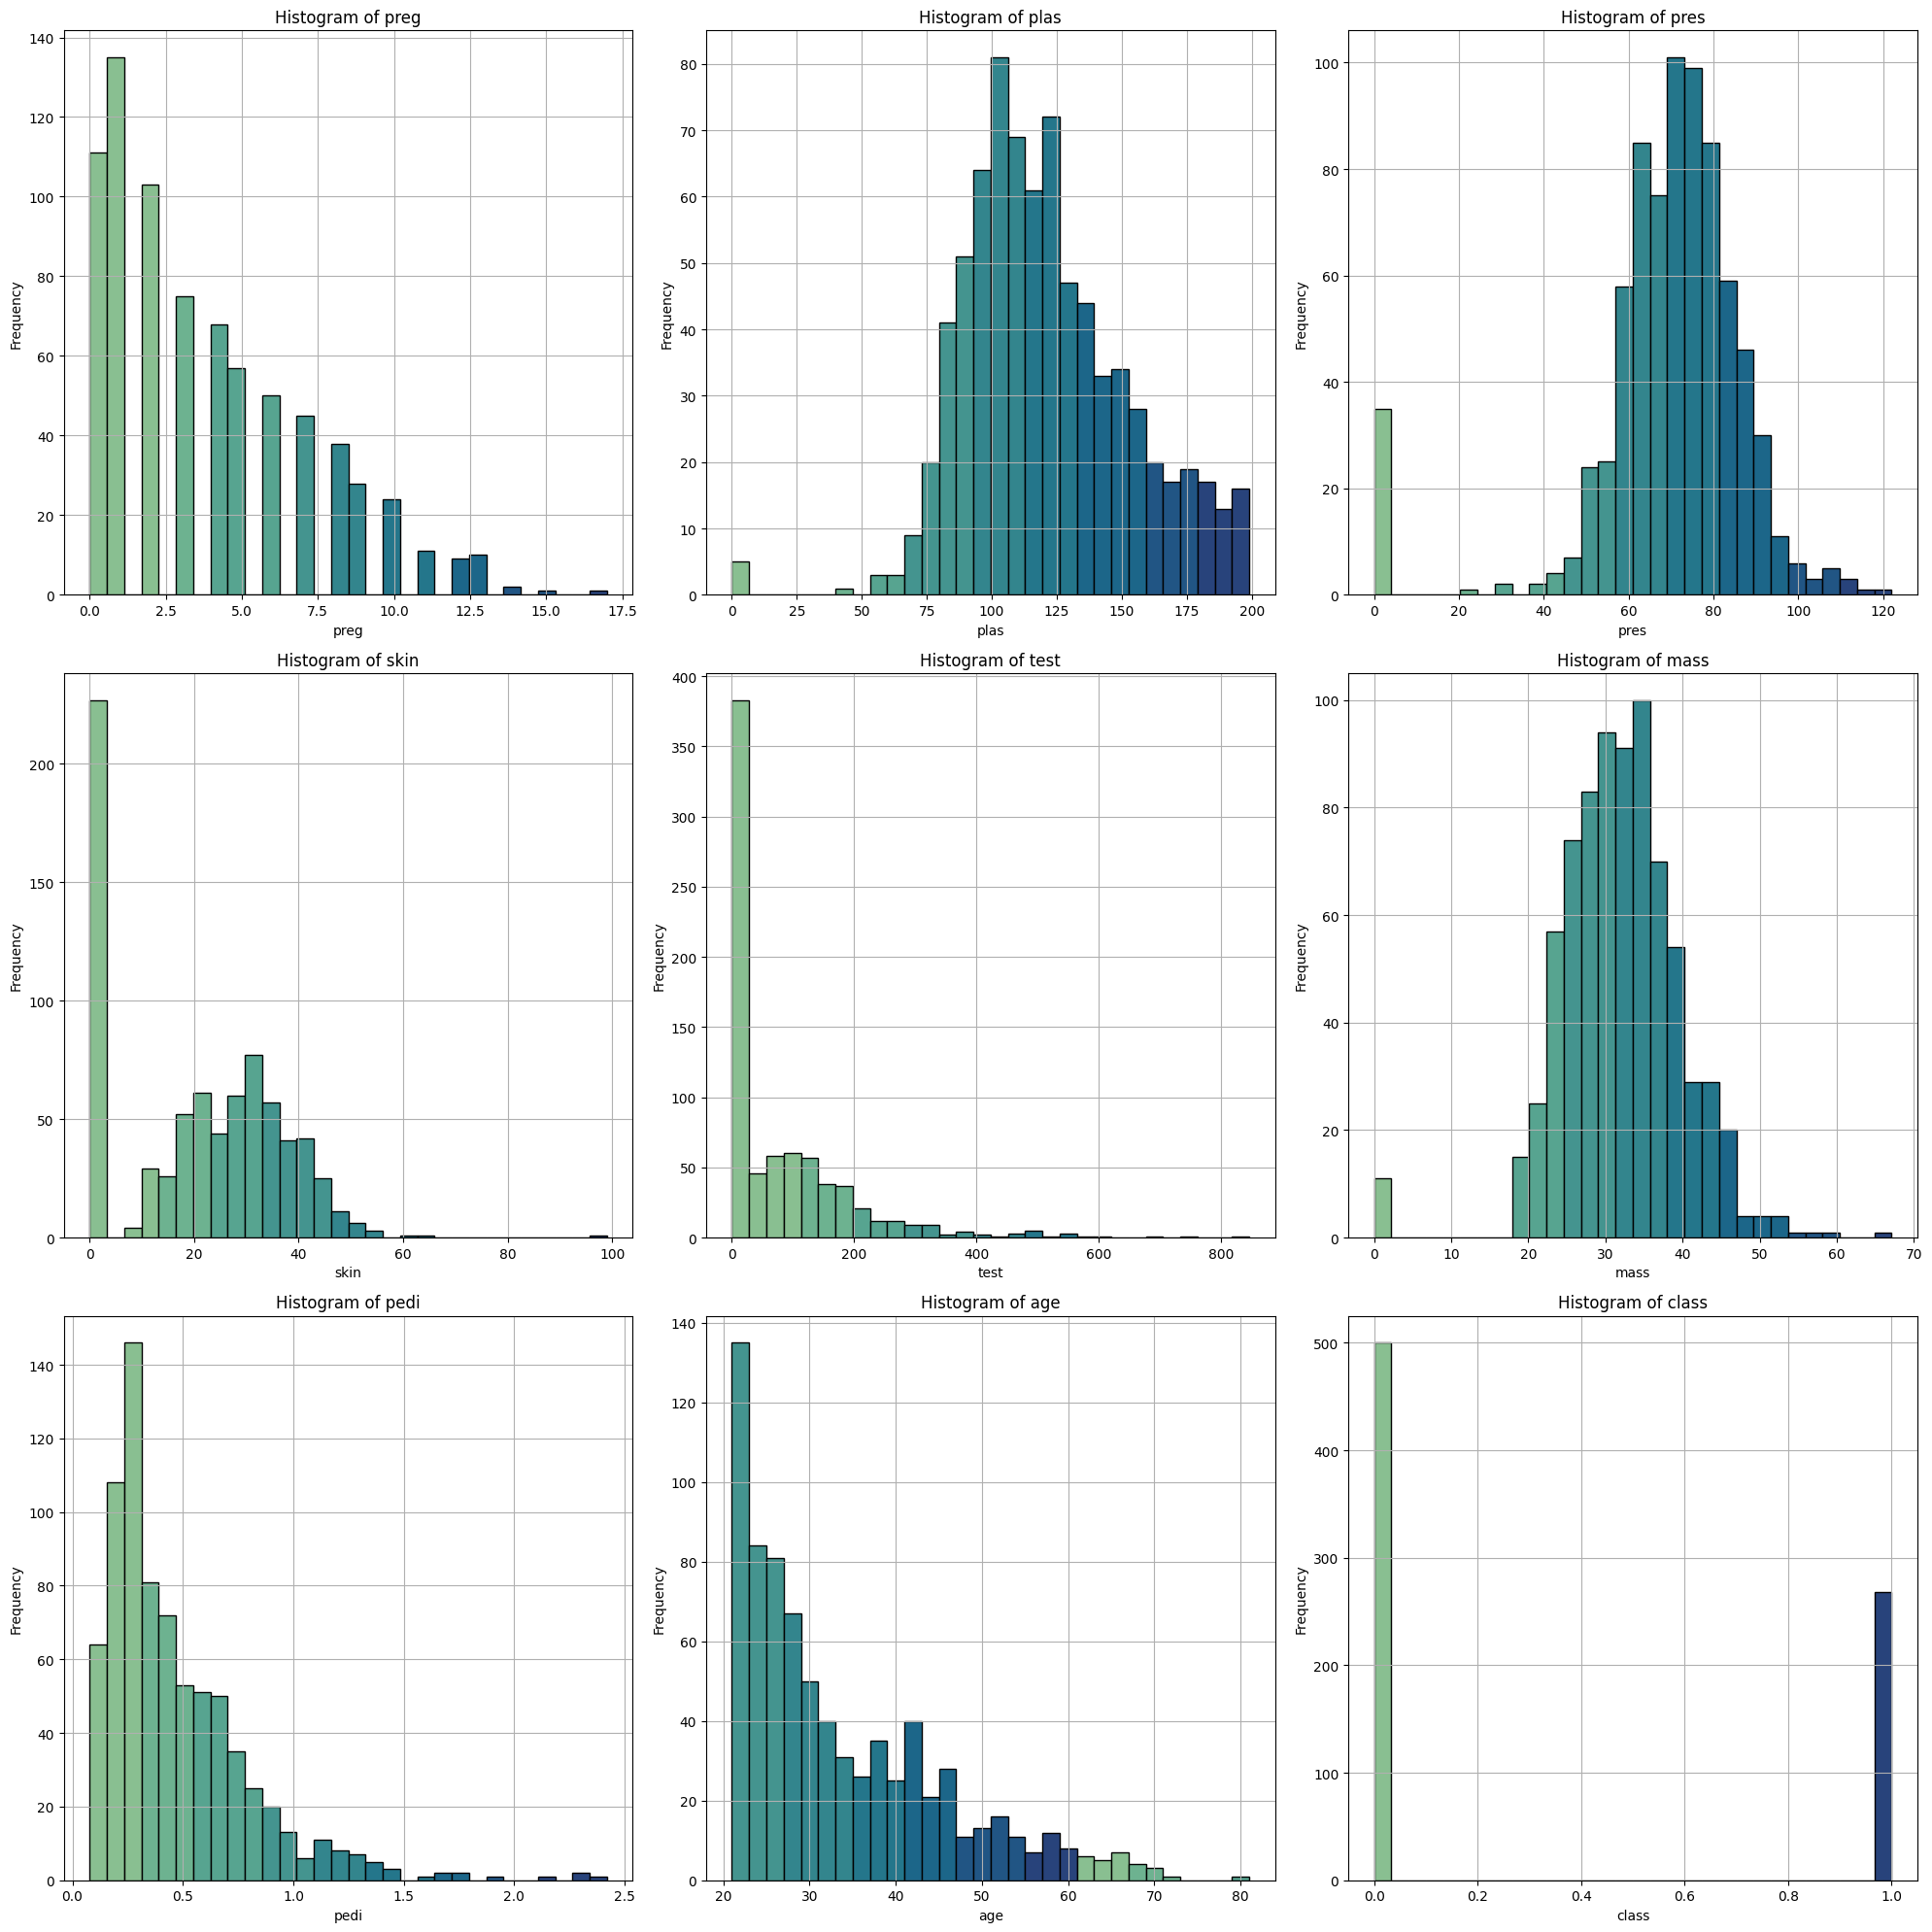

In [ ]:
# Define the color palette
palette = sns.color_palette("crest", len(diabetes_data.columns))

# Create histograms using DataFrame.hist()
p = diabetes_data.hist(figsize=(20, 20), bins=30, edgecolor='black')

# Iterate through each subplot and apply the color from the palette
for ax, column in zip(p.flatten(), diabetes_data.columns):
    # Set the color for the histogram bars
    for patch in ax.patches:
        # Calculate the color index based on the number of bins
        color_index = int(patch.get_x() / (patch.get_width() * len(ax.patches)) * len(palette))
        patch.set_facecolor(palette[color_index % len(palette)])

    # Set title and labels
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
diabetes_data['preg'].fillna(diabetes_data['preg'].mean(), inplace = True)
diabetes_data['plas'].fillna(diabetes_data['plas'].mean(), inplace = True)
diabetes_data['skin'].fillna(diabetes_data['skin'].median(), inplace = True)
diabetes_data['test'].fillna(diabetes_data['test'].median(), inplace = True)
diabetes_data['mass'].fillna(diabetes_data['mass'].median(), inplace = True)
diabetes_data['pedi'].fillna(diabetes_data['pedi'].median(), inplace = True)
diabetes_data['age'].fillna(diabetes_data['age'].median(), inplace = True)
diabetes_data['class'].fillna(diabetes_data['class'].median(), inplace = True)

In [ ]:
print(diabetes_data.isnull().sum())

preg      0
plas      0
pres     35
skin      0
test      0
mass      0
pedi      0
age       0
class     0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicate_rows = diabetes_data[diabetes_data.duplicated()]

# Display the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

# Display the duplicate rows (optional)
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [preg, plas, pres, skin, test, mass, pedi, age, class]
Index: []


In [ ]:
#Import StandardScaler
import pandas as pd
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data.drop(["class"],axis = 1),),
        columns=['preg', 'plas', 'skin', 'test', 'mass',
       'pedi', 'age', 'class'])

,preg,plas,skin,test,mass,pedi,age,class
0,5.062549e-01,0.865108,-0.032746,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-1.175289e+00,-1.206162,-0.517645,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.178873e+00,2.015813,-0.679278,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-1.175289e+00,-1.074652,-0.517645,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,2.987023e-16,0.503458,-2.618874,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
X.head()

,preg,plas,skin,test,mass,pedi,age,class
0,5.062549e-01,0.865108,-0.032746,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-1.175289e+00,-1.206162,-0.517645,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.178873e+00,2.015813,-0.679278,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-1.175289e+00,-1.074652,-0.517645,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,2.987023e-16,0.503458,-2.618874,0.670643,0.316566,1.549303,5.484909,-0.020496


**Data Analysis**

**Creating Pie Chart**

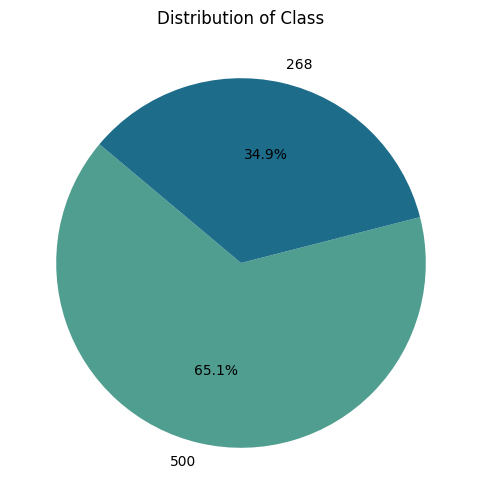

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data loading
# diabetes_dataset = pd.read_csv('pima-indians-diabetes.csv')

# Calculate the value counts of the 'class' column
class_counts = diabetes_data['class'].value_counts()

# Define the color palette
palette = sns.color_palette("crest", len(class_counts))

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts, colors=palette, autopct='%1.1f%%', startangle=140)

# Title of the plot
plt.title('Distribution of Class')

# Display the plot
plt.show()

**Creating Boxplots**

<ipython-input-47-c1ed06dcc880>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=target, y=data[feature], palette='BuGn', legend = False)
<ipython-input-47-c1ed06dcc880>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=target, y=data[feature], palette='BuGn', legend = False)
<ipython-input-47-c1ed06dcc880>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=target, y=data[feature], palette='BuGn', legend = False)
<ipython-input-47-c1ed06dcc880>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

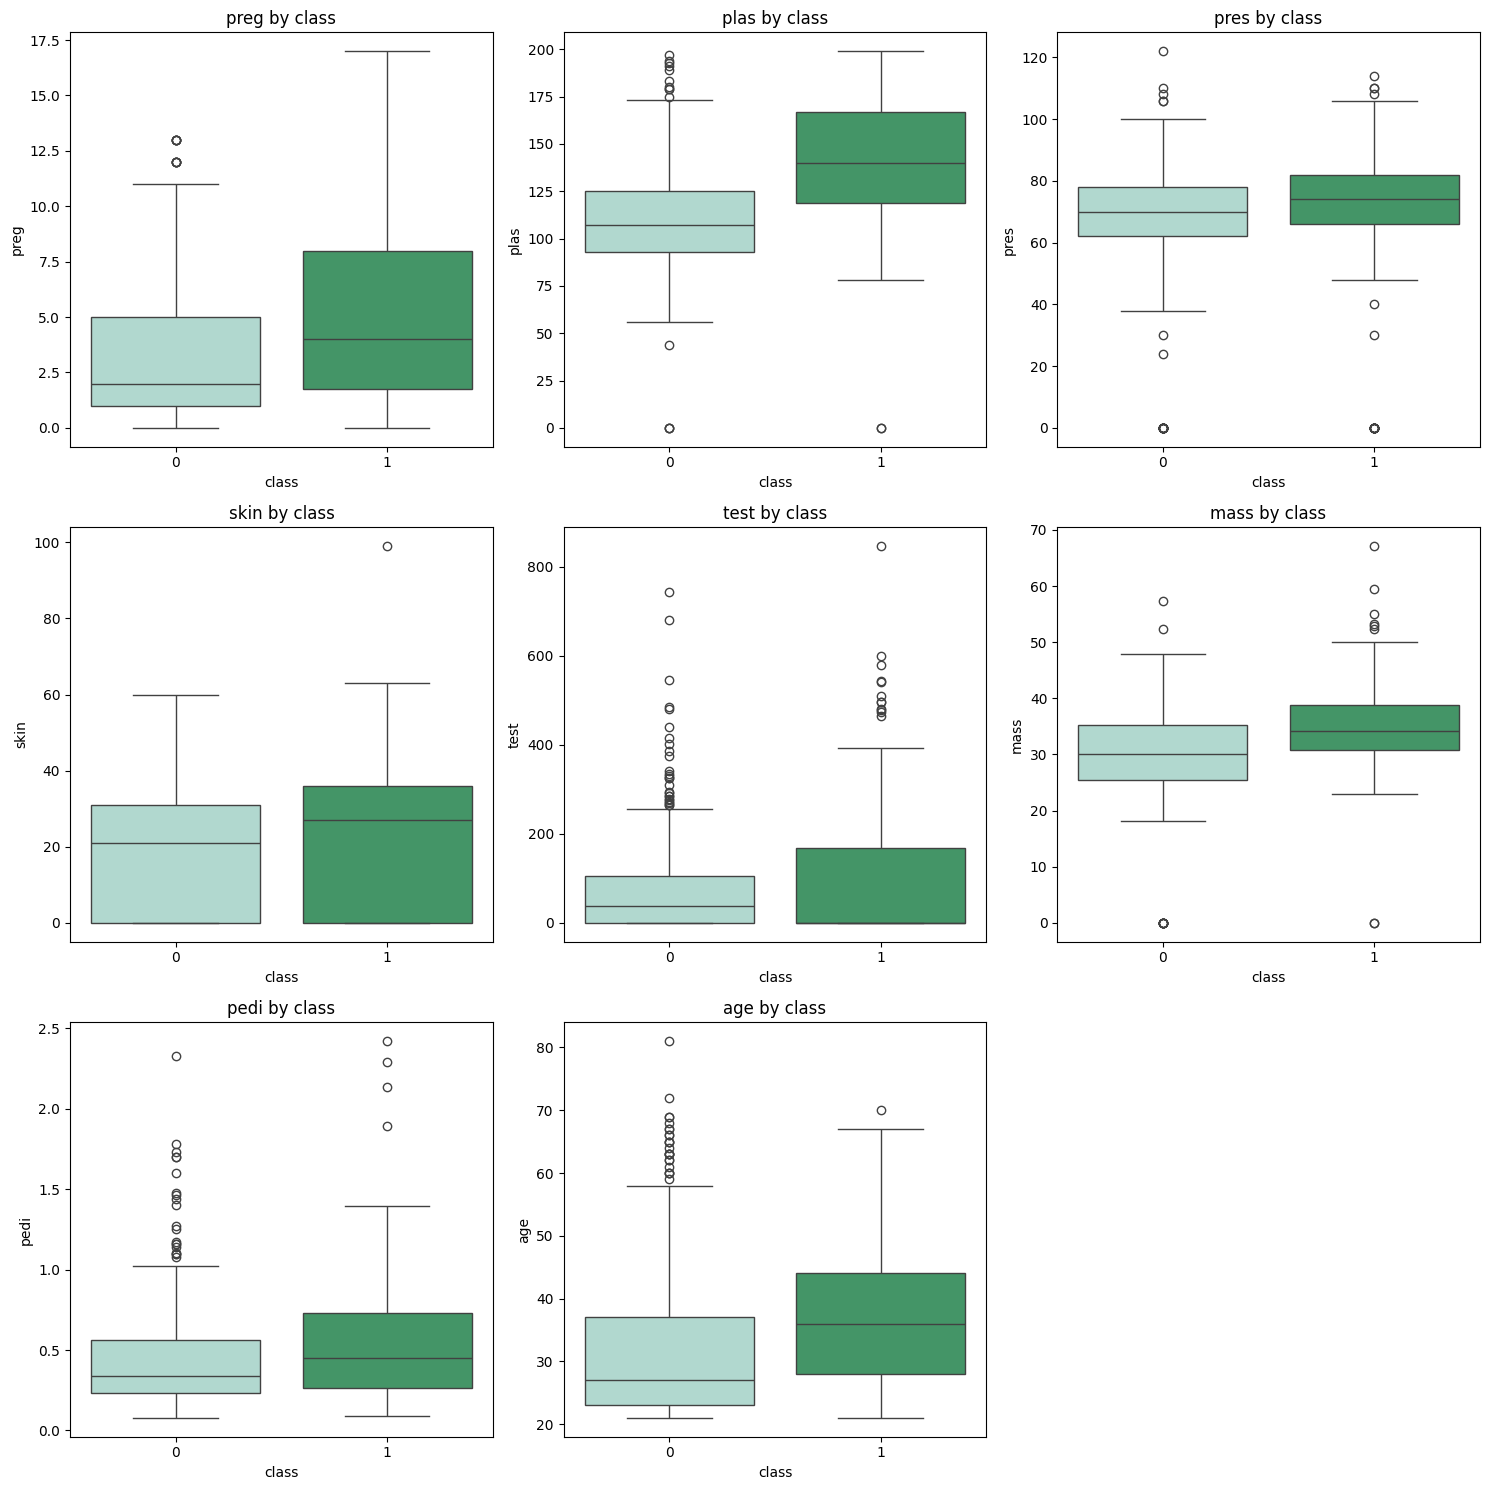

In [ ]:
#Assuming 'diabetes_data' is your DataFrame
features = diabetes_data.drop('class', axis=1)  #Define features by dropping the target column
target = diabetes_data['class']  #Define the target variable

def plot_boxplots(data, target, target_name='class'):
    num_features = data.shape[1]
    num_rows = (num_features + 2) // 3  #Determine number of rows for subplot grid

    plt.figure(figsize=(15, num_rows * 5))

    for i, feature in enumerate(data.columns):
        plt.subplot(num_rows, 3, i + 1)
        ax = sns.boxplot(x=target, y=data[feature], palette='BuGn', legend = False)
        plt.title(f'{feature} by {target_name}')
        plt.xlabel(target_name)
        plt.ylabel(feature) # This line was mis-indented

    plt.tight_layout() # Now correctly aligned with the for loop
    plt.show()

plot_boxplots(features, target) #Call the function with the defined variables

**Creating Violinplots**

<ipython-input-24-4d49d64e83ad>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=data[feature], palette='BuGn')
<ipython-input-24-4d49d64e83ad>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=data[feature], palette='BuGn')
<ipython-input-24-4d49d64e83ad>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=data[feature], palette='BuGn')
<ipython-input-24-4d49d64e83ad>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to

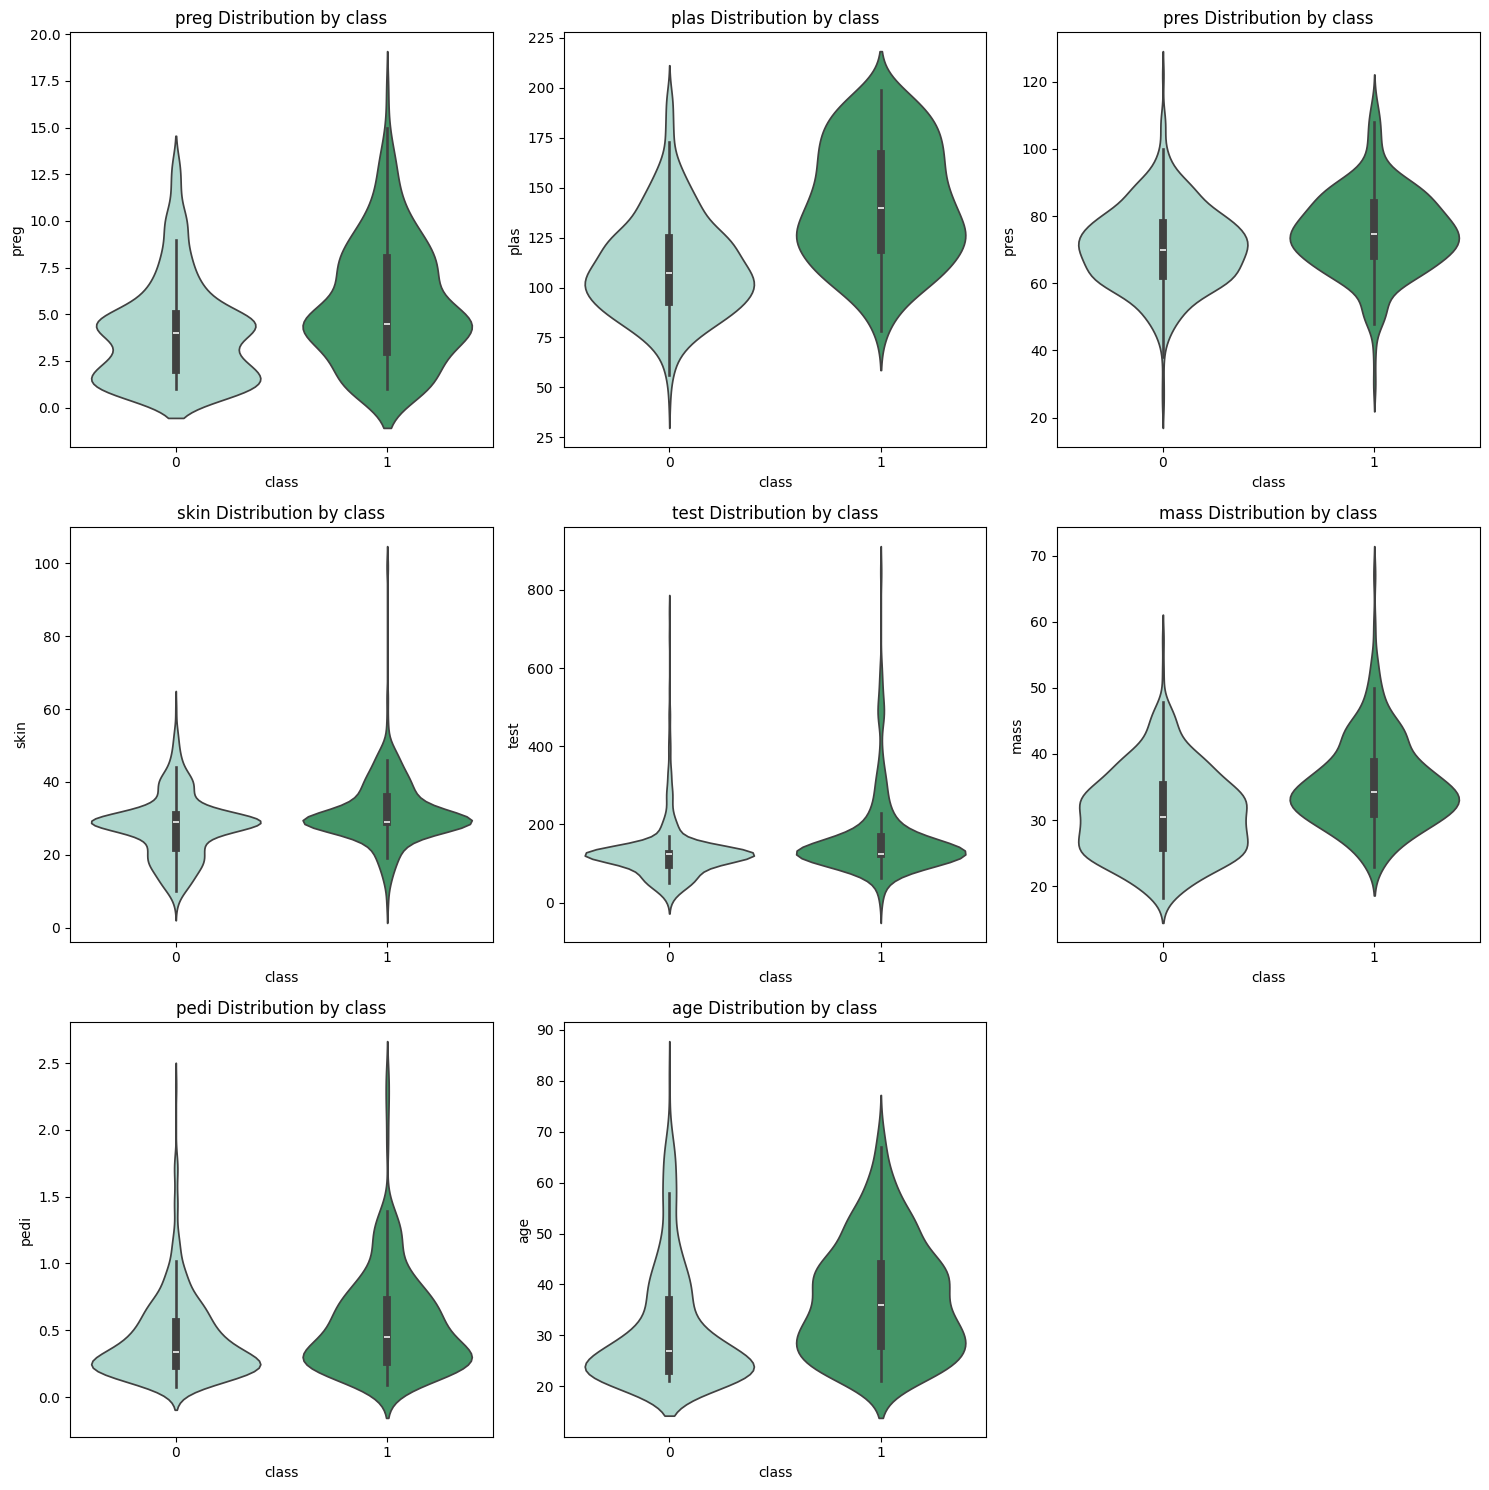

In [ ]:
def plot_violinplots(data, target, target_name='class'):
    num_features = data.shape[1]
    num_rows = (num_features + 2) // 3  # Determine number of rows for subplot grid

    plt.figure(figsize=(15, num_rows * 5))

    for i, feature in enumerate(data.columns):
        plt.subplot(num_rows, 3, i + 1)
        sns.violinplot(x=target, y=data[feature], palette='BuGn')
        plt.title(f'{feature} Distribution by {target_name}')
        plt.xlabel(target_name)
        plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

# Example usage
plot_violinplots(features, target)

**Creating Barplots**

<ipython-input-53-760107e31751>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')


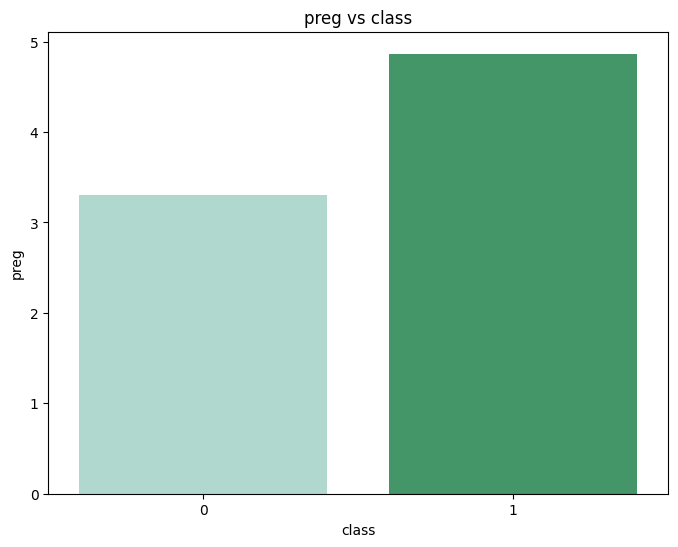

<ipython-input-53-760107e31751>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')


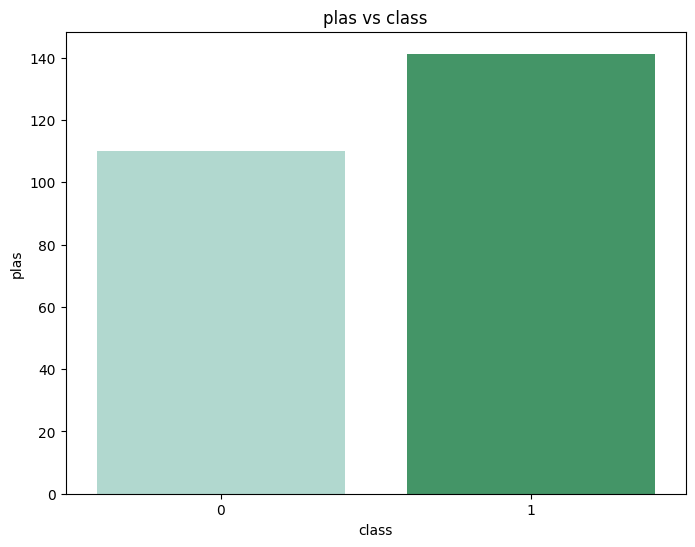

<ipython-input-53-760107e31751>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')


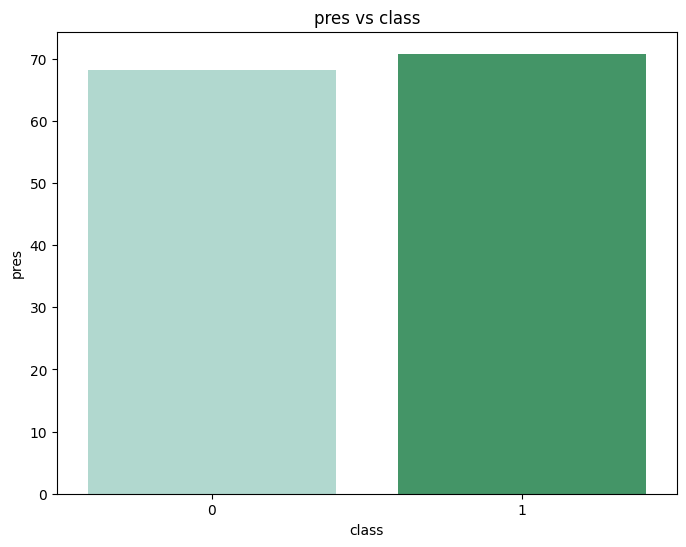

<ipython-input-53-760107e31751>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')


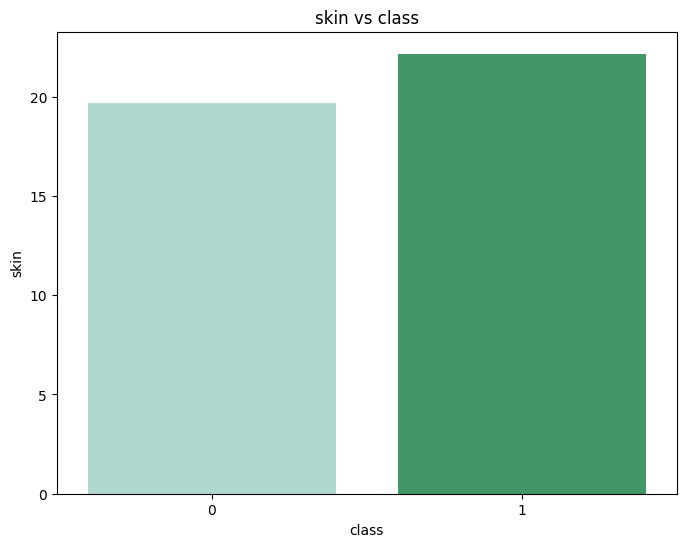

<ipython-input-53-760107e31751>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')


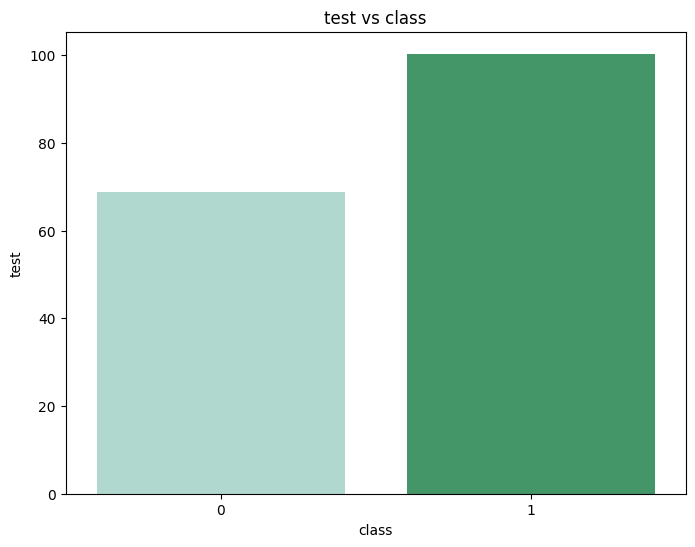

<ipython-input-53-760107e31751>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')


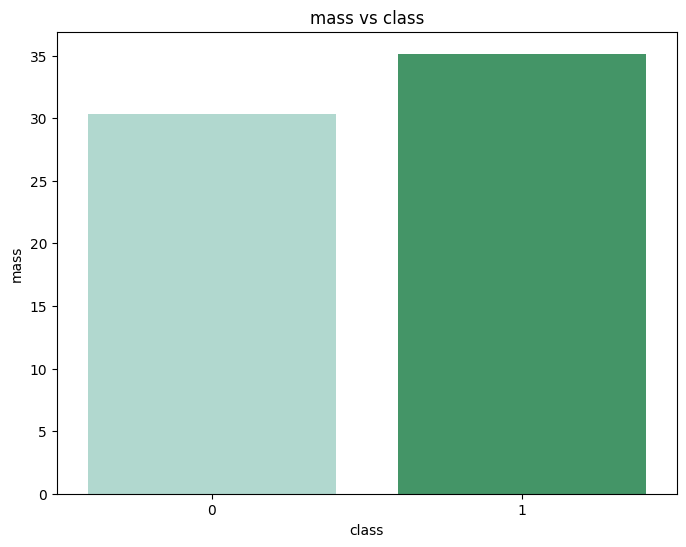

<ipython-input-53-760107e31751>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')


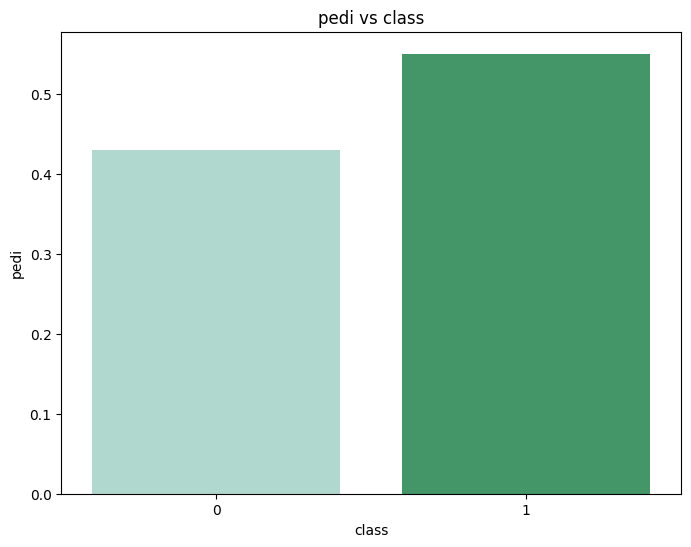

<ipython-input-53-760107e31751>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')


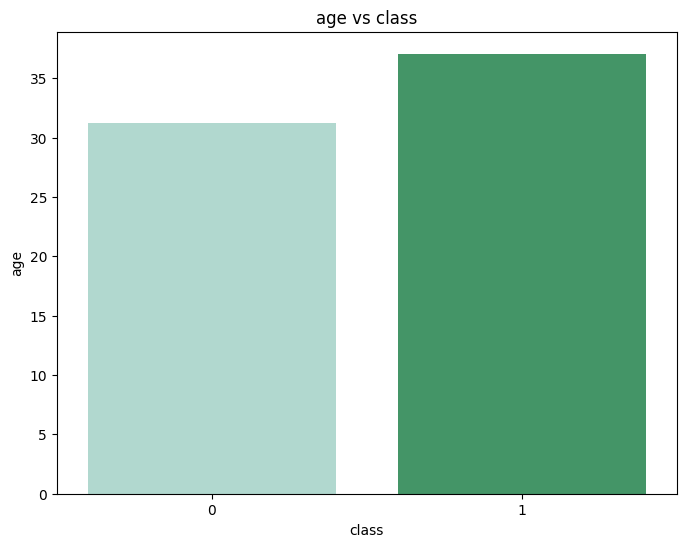

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_individual_barplots_with_labels(data, target, target_name='class'):
    for feature in data.columns:
        plt.figure(figsize=(8, 6))  # Set the size of each plot to 8x6 inches

        # Create a DataFrame for plotting
        plot_data = pd.concat([data[feature], target], axis=1)
        plot_data.columns = [feature, target_name]

        # Calculate mean of feature values for each outcome class
        mean_values = plot_data.groupby(target_name)[feature].mean().reset_index()

        # Create the bar plot
        ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')
        plt.title(f'{feature} vs {target_name}')
        plt.xlabel(target_name)
        plt.ylabel(feature)


        plt.show()  # Display each plot individually

# Example usage
plot_individual_barplots_with_labels(features, target)

**Creating Scatter Plot**

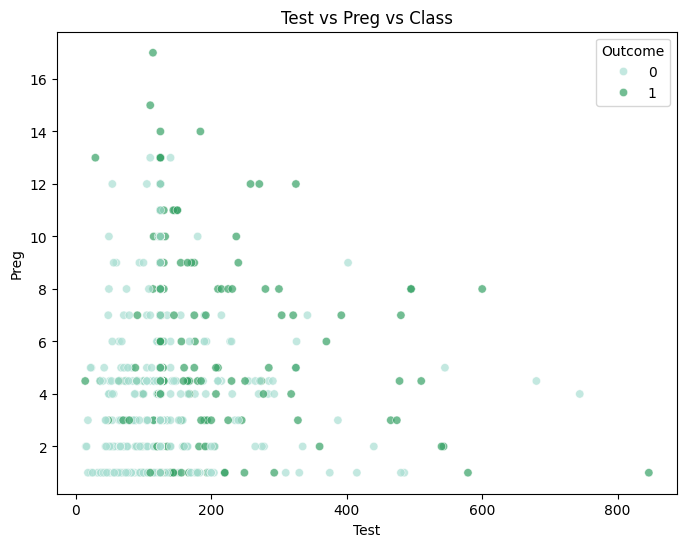

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter_insulin_pregnancies(data, target, target_name='Outcome'):
    # Combine features and target variable into one DataFrame
    plot_data = pd.concat([data[['test', 'preg']], target], axis=1)
    plot_data.columns = ['test', 'preg', target_name]

    # Create a scatter plot with hue
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='test', y='preg', hue=target_name, data=plot_data, palette='BuGn', alpha=0.7)

    # Add plot details
    plt.title('Test vs Preg vs Class')
    plt.xlabel('Test')
    plt.ylabel('Preg')
    plt.legend(title=target_name)

    plt.show()

# Example usage
plot_scatter_insulin_pregnancies(features, target)

**Creating Grouped Barplots**

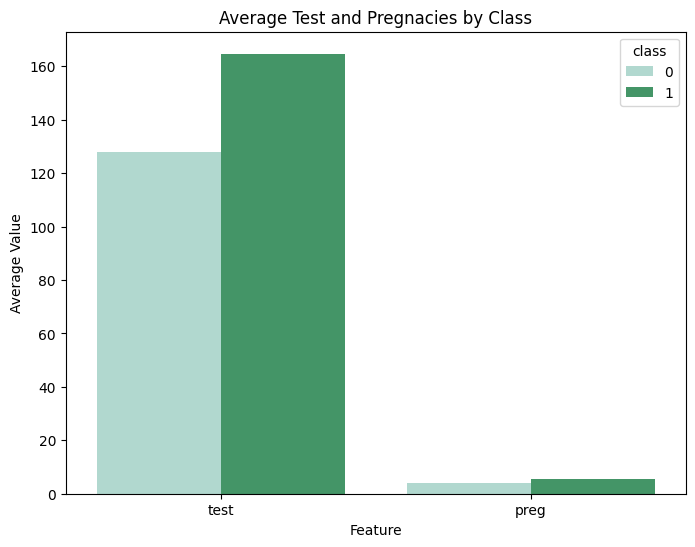

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grouped_barplots(data, target, target_name='class'):
    # Combine features and target variable into one DataFrame
    plot_data = pd.concat([data[['test', 'preg']], target], axis=1)
    plot_data.columns = ['test', 'preg', target_name]

    # Aggregate data: mean values for each outcome class
    avg_values = plot_data.groupby(target_name).mean().reset_index()

    # Melt the DataFrame to long format for plotting
    avg_values_melted = avg_values.melt(id_vars=target_name, var_name='Feature', value_name='Average Value')

    # Create grouped bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Feature', y='Average Value', hue=target_name, data=avg_values_melted, palette='BuGn')

    # Add plot details
    plt.title('Average Test and Pregnacies by Class')
    plt.xlabel('Feature')
    plt.ylabel('Average Value')
    plt.legend(title=target_name)

    plt.show()

# Example usage
plot_grouped_barplots(features, target)

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   plas    768 non-null    float64
 2   pres    733 non-null    float64
 3   skin    768 non-null    float64
 4   test    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


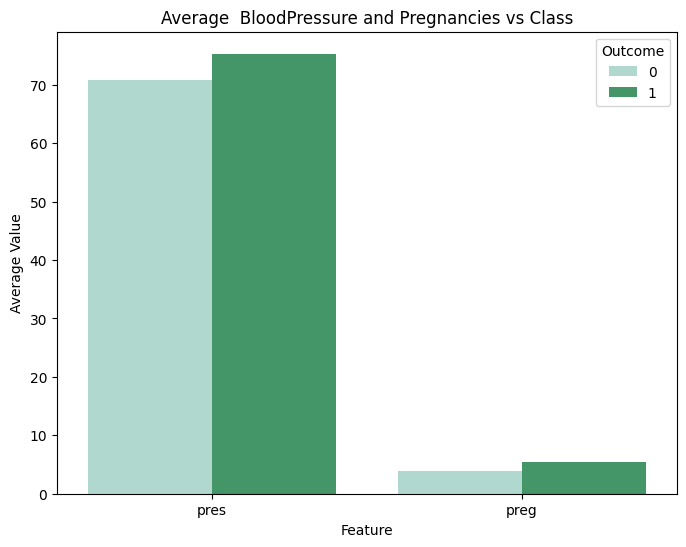

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grouped_barplots(data, target, target_name='Outcome'):
    # Combine features and target variable into one DataFrame
    plot_data = pd.concat([data[['pres', 'preg']], target], axis=1)
    plot_data.columns = ['pres', 'preg', target_name]

    # Aggregate data: mean values for each outcome class
    avg_values = plot_data.groupby(target_name).mean().reset_index()

    # Melt the DataFrame to long format for plotting
    avg_values_melted = avg_values.melt(id_vars=target_name, var_name='Feature', value_name='Average Value')

    # Create grouped bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Feature', y='Average Value', hue=target_name, data=avg_values_melted, palette='BuGn')

    # Add plot details
    plt.title('Average  BloodPressure and Pregnancies vs Class')
    plt.xlabel('Feature')
    plt.ylabel('Average Value')
    plt.legend(title=target_name)

    plt.show()

# Example usage
plot_grouped_barplots(features, target)

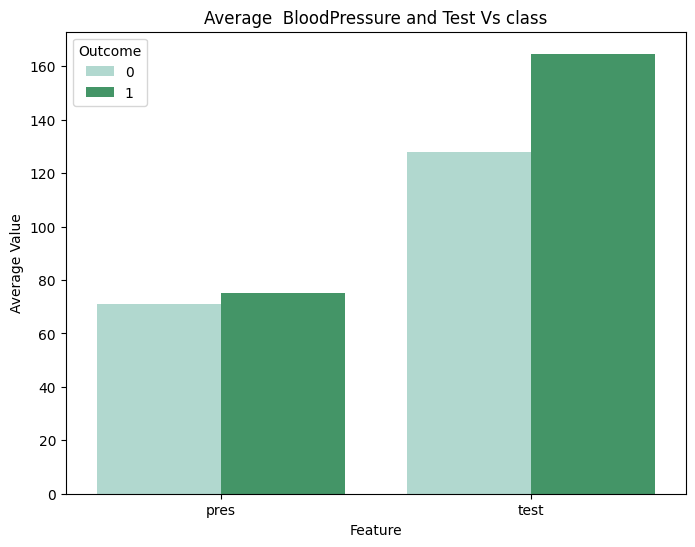

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grouped_barplots(data, target, target_name='Outcome'):
    # Combine features and target variable into one DataFrame
    plot_data = pd.concat([data[['pres', 'test']], target], axis=1)
    plot_data.columns = ['pres', 'test', target_name]

    # Aggregate data: mean values for each outcome class
    avg_values = plot_data.groupby(target_name).mean().reset_index()

    # Melt the DataFrame to long format for plotting
    avg_values_melted = avg_values.melt(id_vars=target_name, var_name='Feature', value_name='Average Value')

    # Create grouped bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Feature', y='Average Value', hue=target_name, data=avg_values_melted, palette='BuGn')

    # Add plot details
    plt.title('Average  BloodPressure and Test Vs class')
    plt.xlabel('Feature')
    plt.ylabel('Average Value')
    plt.legend(title=target_name)

    plt.show()

# Example usage
plot_grouped_barplots(features, target)

**Data Preparation**

In [38]:
X = features
y = target

#Importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Assuming 'features' and 'target' are your data and labels
X = features
y = target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Handle missing values using imputation
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) # Use the same imputer fitted on training data

# Now fit the model
reg = LogisticRegression()
reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Now use the imputed data for training your model
reg.fit(X_train_imputed, y_train)

# Make predictions using the imputed test data
y_pred=reg.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

# Use X_train_imputed instead of X_train to calculate the score
print("Training Score:\n",reg.score(X_train_imputed,y_train)*100)

print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.71      0.57      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154

Confusion Matrix:
 [[96 11]
 [20 27]]
Training Score:
 76.54723127035831
Mean Squared Error:
 0.2012987012987013
R2 score is:
 0.05070590574666933


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Creating Confusion Matrix**

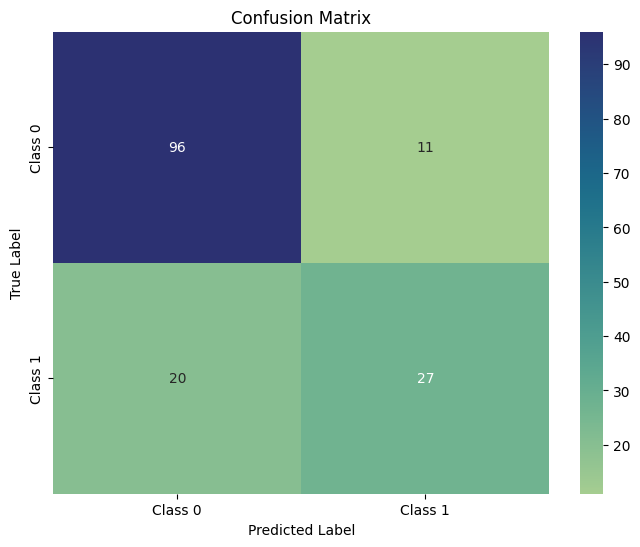

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(accuracy_score(y_test,y_pred)*100)

79.87012987012987


**LAB 3**

**Creating Histograms**

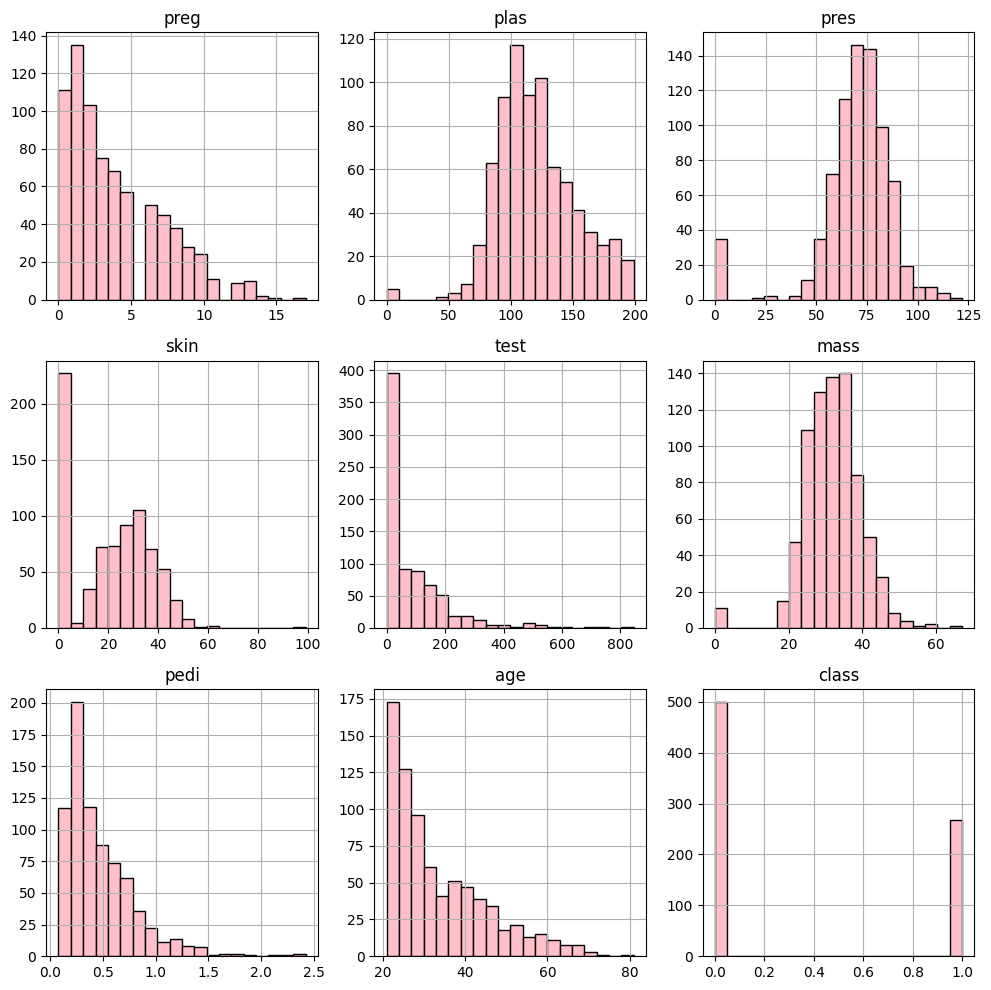

In [36]:
from matplotlib import pyplot
import pandas as pd
palette = sns.color_palette('BuGn', len(diabetes_data.columns))
p = diabetes_data.hist(figsize=(10, 10), bins=20, edgecolor='black', color='pink')
pyplot.tight_layout()
pyplot.show()


**Creating Density Plots**

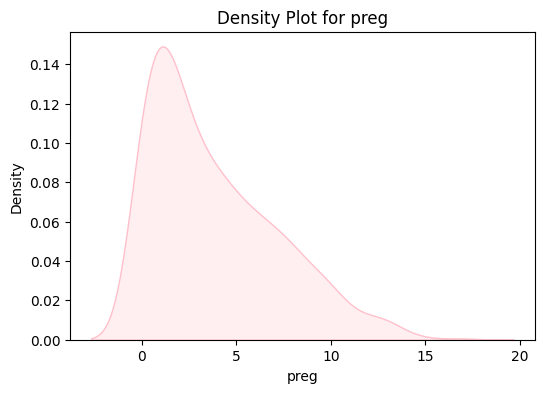

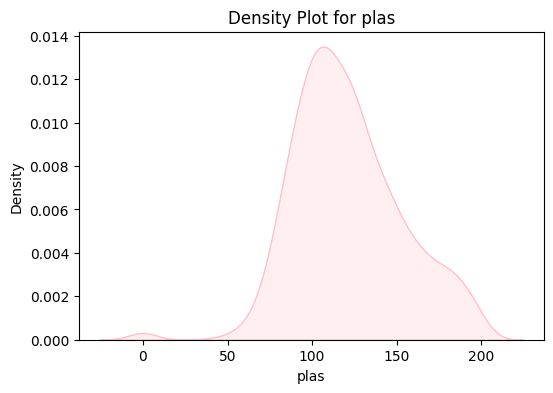

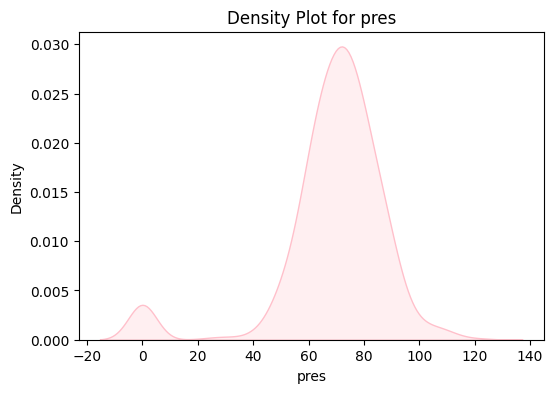

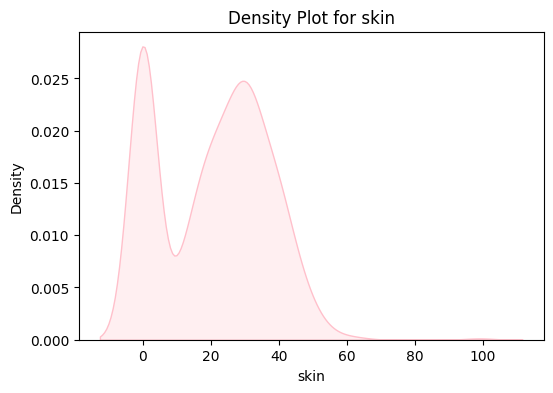

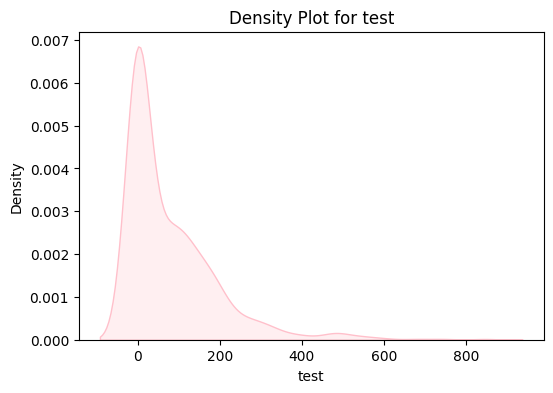

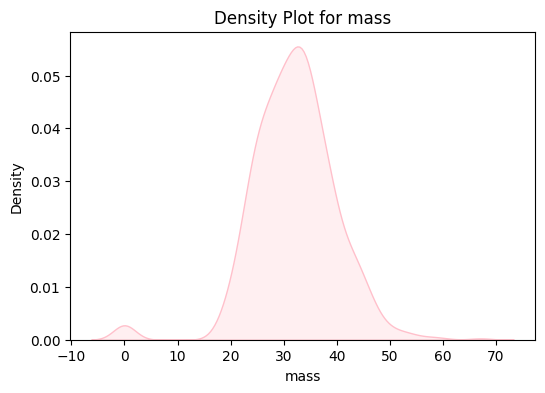

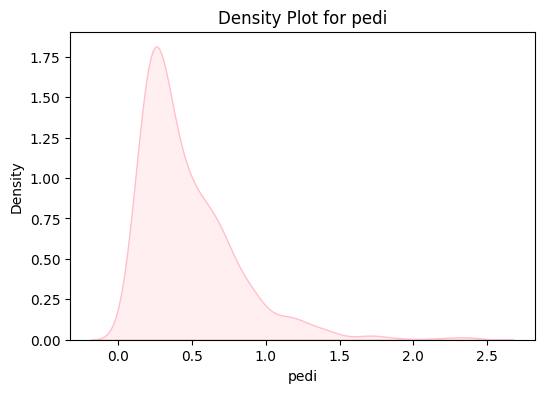

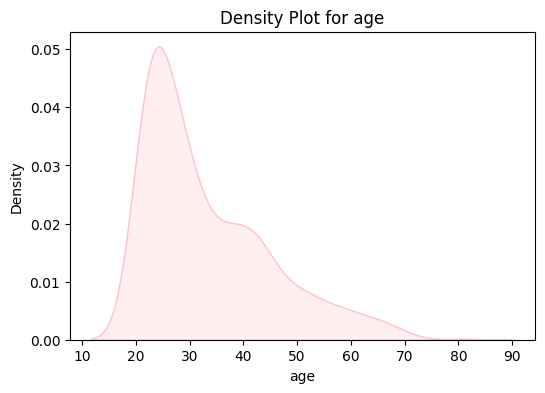

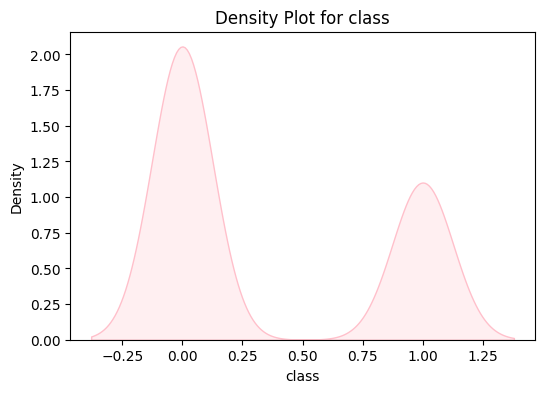

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'diabetes_data' is your DataFrame
# and you want to create density plots for each column
for col in ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=diabetes_data[col], fill=True, color="pink")
    plt.title(f"Density Plot for {col}")
    plt.show()

**Creating** **Boxplots**

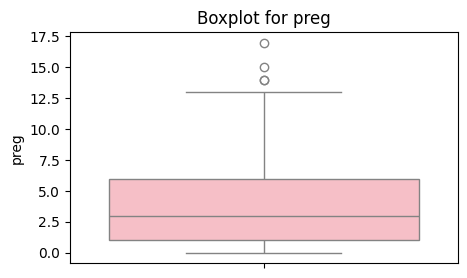

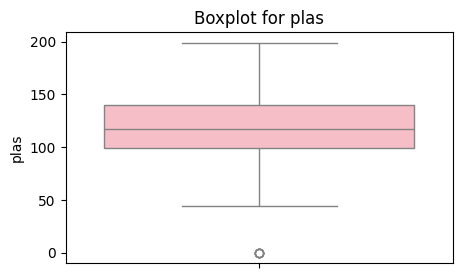

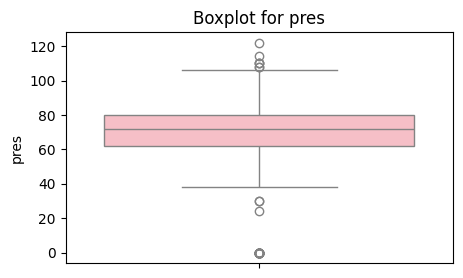

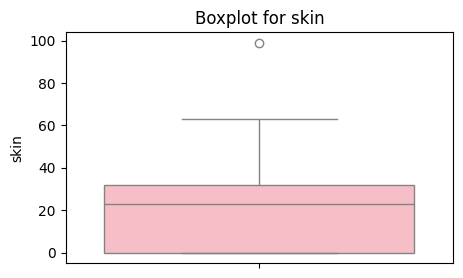

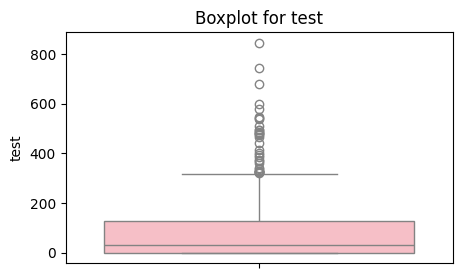

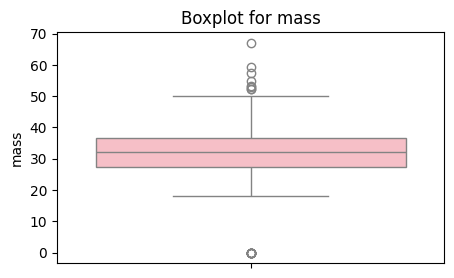

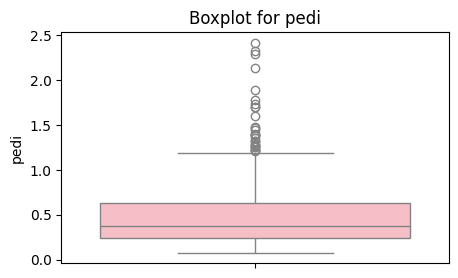

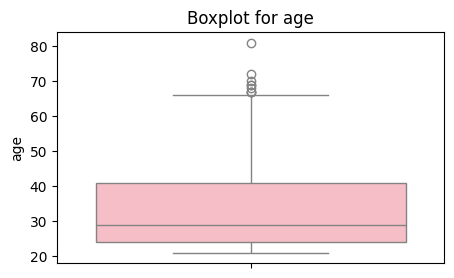

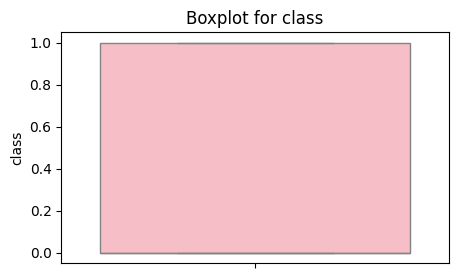

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'diabetes_data' is your DataFrame
# and you want to create boxplots for each column
for col in ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']:
    plt.figure(figsize=(5, 3))  # Set the figure size
    sns.boxplot(data=diabetes_data, y=col, color="lightpink")  # Create boxplot for each column
    plt.title(f"Boxplot for {col}")
    plt.show()

**Creating Scatter Plots**

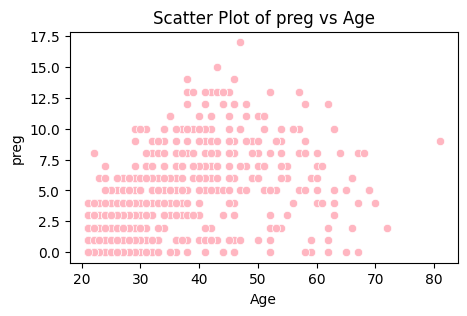

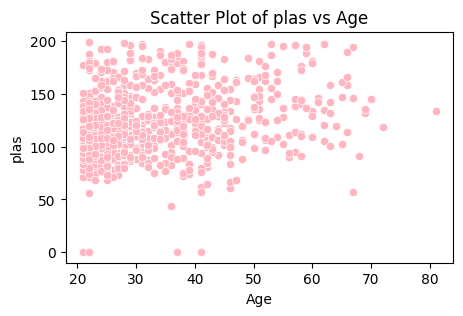

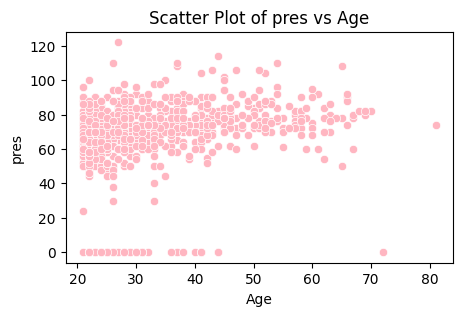

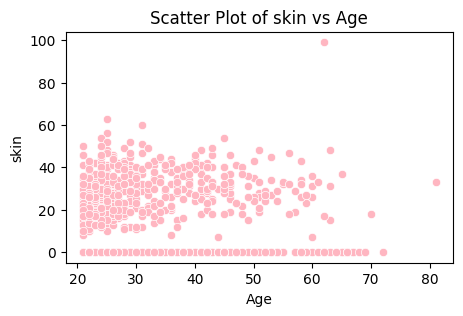

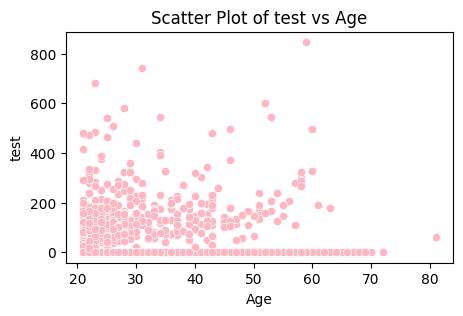

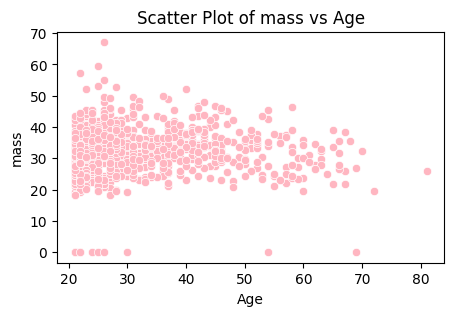

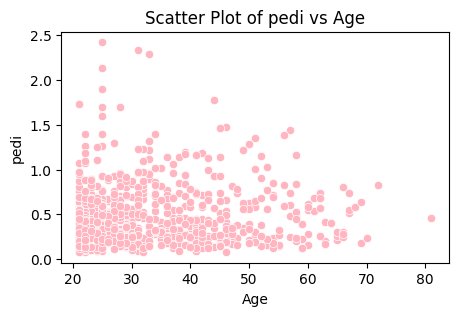

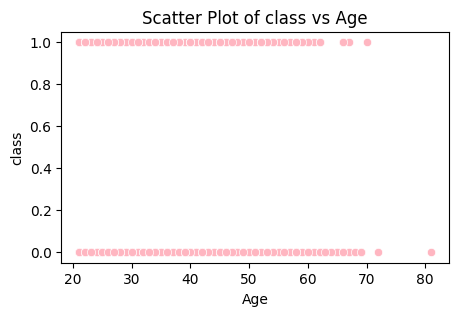

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'diabetes_data' is your DataFrame
# and you want to create scatter plots for each column against 'age'
for col in ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'class']:  # 'age' is used as x-axis
    plt.figure(figsize=(5, 3))  # Set the figure size
    sns.scatterplot(x=diabetes_data['age'], y=diabetes_data[col], color="lightpink")  # Create scatterplot
    plt.title(f"Scatter Plot of {col} vs Age")
    plt.xlabel("Age")  # Label for x-axis
    plt.ylabel(col)  # Label for y-axis
    plt.show()
